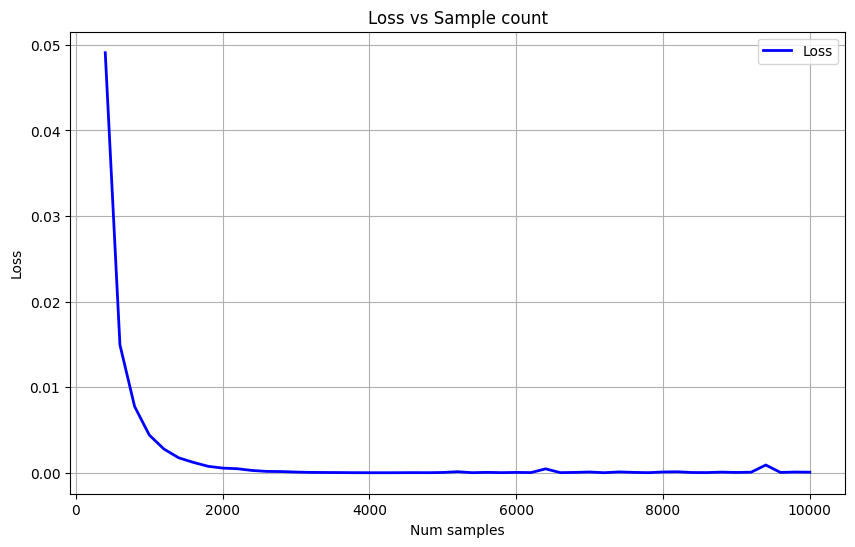

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_loss_vs_timesteps(csv_file, loss_column='train/loss', timestep_column='time/total_timesteps'):
    """
    Plots the loss as a function of timesteps from a CSV file.

    Args:
        csv_file (str): Path to the CSV file containing logs.
        loss_column (str): Name of the column representing loss. Default is 'train/loss'.
        timestep_column (str): Name of the column representing timesteps. Default is 'time/total_timesteps'.
    """
    # Load the CSV file
    data = pd.read_csv(csv_file)

    # Check if the required columns are in the CSV
    if loss_column not in data.columns or timestep_column not in data.columns:
        raise ValueError(f"Missing columns in CSV. Ensure it contains '{loss_column}' and '{timestep_column}'.")

    # Drop rows with NaN values in the specified columns
    data = data.dropna(subset=[loss_column, timestep_column])

    # Extract timesteps and loss values
    timesteps = data[timestep_column]
    timesteps/=2048
    timesteps*= 200

    loss = data[loss_column]

    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.plot(timesteps, loss, label='Loss', color='blue', linewidth=2)
    plt.xlabel('Num samples')
    plt.ylabel('Loss')
    plt.title('Loss vs Sample count')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
# Replace 'path/to/logs.csv' with the actual path to your CSV file
plot_loss_vs_timesteps('progress.csv', loss_column='train/value_loss', timestep_column='time/total_timesteps')
